<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Matplotlib: Exploring <br> <br> <br>Data Visualization</p><br><br>

<br><br><center><h1 style="font-size:2em;color:#2467C0">World Development Indicators</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/4/46/North_South_divide.svg" align="middle" style="width:550px;height:360px;"/></td>
<td>
This week, we will be using an open dataset from <a href="https://www.kaggle.com">Kaggle</a>. It is  <a href="https://www.kaggle.com/worldbank/world-development-indicators">The World Development Indicators</a> dataset obtained from the World Bank containing over a thousand annual indicators of economic development from hundreds of countries around the world.
<br>
<br>
This is a slightly modified version of the original dataset from <a href="http://data.worldbank.org/data-catalog/world-development-indicators">The World Bank</a>
<br>
<br>
List of the <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data">available indicators</a> and a <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data">list of the available countries</a>.
</td>
</tr>
</table>

In [1]:
import random 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Indicators.csv")

In [3]:
countries = data['CountryName'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()

In [4]:
print(len(countries))
print(len(indicators))

247
1344


In [5]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


Looks like it has different indicators for different countries with the year and value of the indicator.




We already saw how the USA's per-capita CO2 production related to other countries, let's see if we can find some more indicators in common between countries.  

To have some fun, we've picked countries randomly but then stored our random results so you can rerun it with the same answers.

In [6]:
# Filter 1

# Picks years of choice
yearsFilter = [2010,2011,2012,2013,2014]
yearsFilter

[2010, 2011, 2012, 2013, 2014]

In [7]:
# Filter 2 

# Pick 2 countries randomly
countryFilter = random.sample(countries,2)
countryFilter

['Finland', 'Afghanistan']

In [8]:
# Filter 3

# Pick 1 Indicator randomly
indicatorsFilter = random.sample(indicators,1)
indicatorsFilter

['Insurance and financial services (% of commercial service exports)']

# Problem:  We're missing data.
# Not all countries have all indicators for all years

To solve this, we'll need to find two countries and two indicators for which we have data over this time range.

In [9]:
filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
country1_data = data.loc[filterMesh]
    

In [10]:
len(country1_data)

4

In [11]:
filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
country2_data = data.loc[filterMesh]

ISIN :Return boolean DataFrame showing whether each element in the DataFrame is contained in values.

    https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html

In [12]:
len(country2_data)

4

### Okay, từ 2 filter trên ta có thể thấy rằng: Not all countries have all indicators for all years , để giải quyết we'll need to find two countries and two indicators for which we have data over this time range. (như trên)
 

# So let's pick indicators and countries which have data over this time range

The code below will randomly pick countries and indicators until it finds two countries who have data for an indicator over this time frame. We used it to produce the fixed values you see later, feel free to play with this yourself!

In [13]:
filteredData1 = []
filteredData2 = []

In [14]:
'''
Plot: 
countryFilter:    pick two countries, 
indicatorsFilter: pick an indicator, 
yearsFilter: plot for years in yearsFilter
'''
# problem - not all countries have all indicators so if you go to visualize, it'll have missing data.
# randomly picking two indicators and countries, do these countries have valid data over those years.
# brings up the discussion of missing data/ missing fields
# until we find full data

while (len(filteredData1) < len(yearsFilter)-1 ):
    #pick new indicator
    indicatorFilter = random.sample(indicators,1)
    countryFilter    = random.sample(countries, 2)
    # how many rows are there that have this country name, this indicator, and this year.  Mesh gives bool vector
    filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    # which rows have this condition to be true?
    filteredData1 = data.loc[filterMesh]
    filteredData1 = filteredData1[['CountryName','IndicatorName','Year','Value']]
    # need to print this only when our while condition is true
    if(len(filteredData1) < len(yearsFilter)-1):
        print('Skipping ... %s since very few rows (%d) found' % (indicatorsFilter, len(filteredData1)))


In [15]:
# What did we pick eventually ?
indicatorsFilter

['Insurance and financial services (% of commercial service exports)']

In [16]:
len(filteredData1)

4

In [17]:
'''
Country 2
'''

while(len(filteredData2) < len(filteredData1)-1):
    filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    filteredData2 = data.loc[filterMesh]
    filteredData2 = filteredData2[['CountryName','IndicatorName','Year','Value']]
    #pick new indicator
    old = countryFilter[1]
    countryFilter[1]    = random.sample(countries, 1)[0]
    
    if(len(filteredData2) < len(filteredData1)-1):
        print('Skipping ... %s, since very few rows (%d) found' % (old, len(filteredData2)))

In [18]:
if len(filteredData1) < len(filteredData2):
    small = len(filteredData1)
else:
    small = len(filteredData2)

In [19]:
small

4

In [20]:
filteredData1=filteredData1[0:small]
filteredData2=filteredData2[0:small]

In [21]:
filteredData1

,CountryName,IndicatorName,Year,Value
4969252,New Caledonia,Insurance and financial services (% of commerc...,2010,2.391187
5148753,New Caledonia,Insurance and financial services (% of commerc...,2011,1.472536
5324422,New Caledonia,Insurance and financial services (% of commerc...,2012,2.457859
5486473,New Caledonia,Insurance and financial services (% of commerc...,2013,3.433778


In [22]:
filteredData2

,CountryName,IndicatorName,Year,Value
4908921,El Salvador,Insurance and financial services (% of commerc...,2010,2.198827
5091660,El Salvador,Insurance and financial services (% of commerc...,2011,2.117399
5267451,El Salvador,Insurance and financial services (% of commerc...,2012,4.093447
5435921,El Salvador,Insurance and financial services (% of commerc...,2013,4.407750


<br><p style="font-family: Arial; font-size:2.75em;color:blue; font-style:bold">
Matplotlib: Additional Examples</p><br>

## Example: Scatter Plot

Now that we have the data for two countries for the same indicators, let's plot them using a scatterplot.

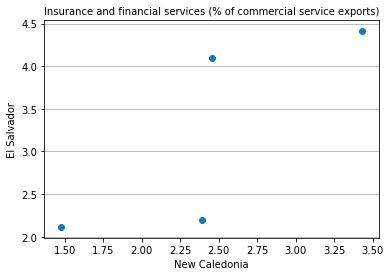

In [23]:

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title(indicatorsFilter[0],fontsize=10)
axis.set_xlabel(filteredData1['CountryName'].iloc[0],fontsize=10)
axis.set_ylabel(filteredData2['CountryName'].iloc[0],fontsize=10)

X = filteredData1['Value']
Y = filteredData2['Value']

axis.scatter(X, Y,)

## Example: Line Plot

Here we'll plot the indicator over time for each country.

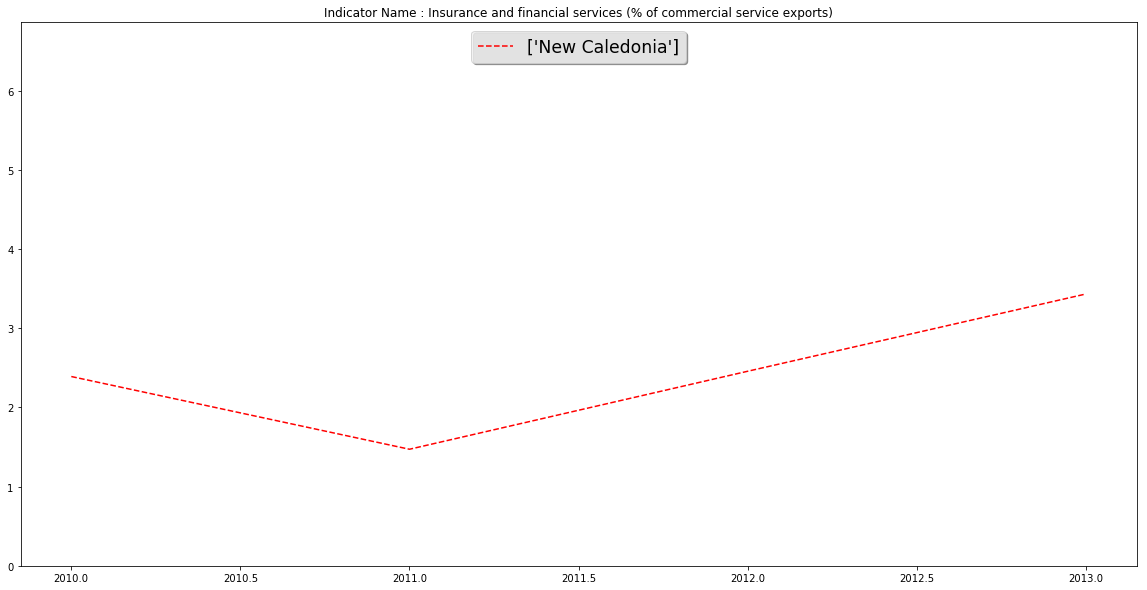

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_ylim(min(0,filteredData1['Value'].min()), 2*filteredData1['Value'].max())
ax.set_title('Indicator Name : ' + indicatorsFilter[0])
ax.plot(filteredData1['Year'], filteredData1['Value'] , 'r--', label=filteredData1['CountryName'].unique()) 

# Add the legend
legend = plt.legend(loc = 'upper center', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

## Let's plot country #2

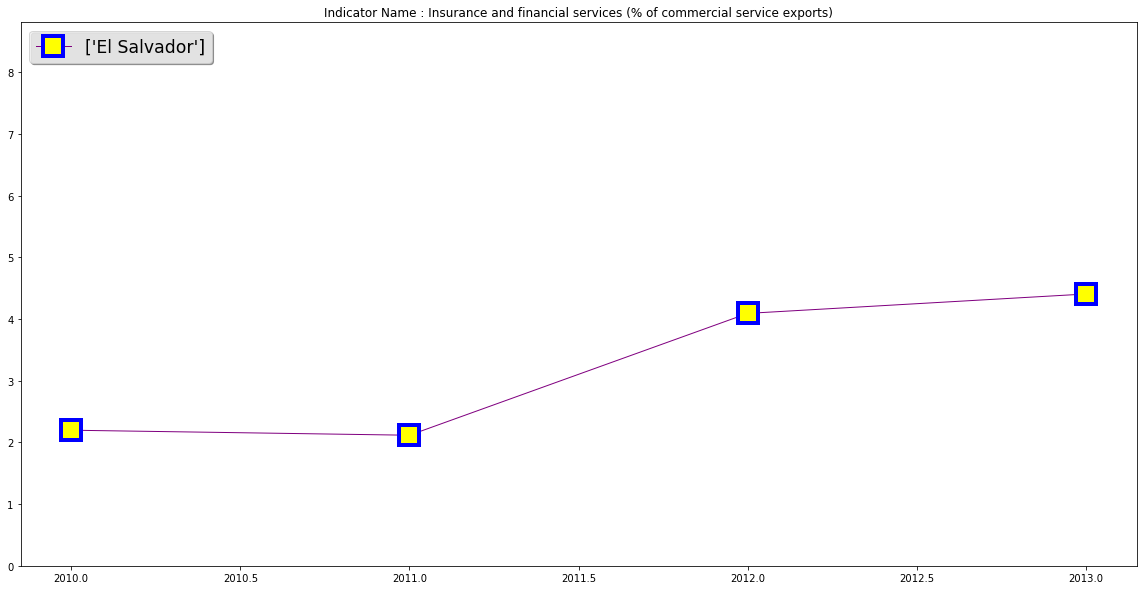

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))

# Adjust the lower and upper limit to bring the graph at center
ax.set_ylim(min(0,filteredData2['Value'].min()), 2*filteredData2['Value'].max())

ax.set_title('Indicator Name : ' + indicatorsFilter[0])
ax.plot(filteredData2['Year'], filteredData2['Value'] ,
         label=filteredData2['CountryName'].unique(),
         color="purple", lw=1, ls='-', 
         marker='s', markersize=20, 
         markerfacecolor="yellow", markeredgewidth=4, markeredgecolor="blue") 

# Add the legend
legend = plt.legend(loc = 'upper left', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# Rectangle around the legend
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

# Example (random datasets)

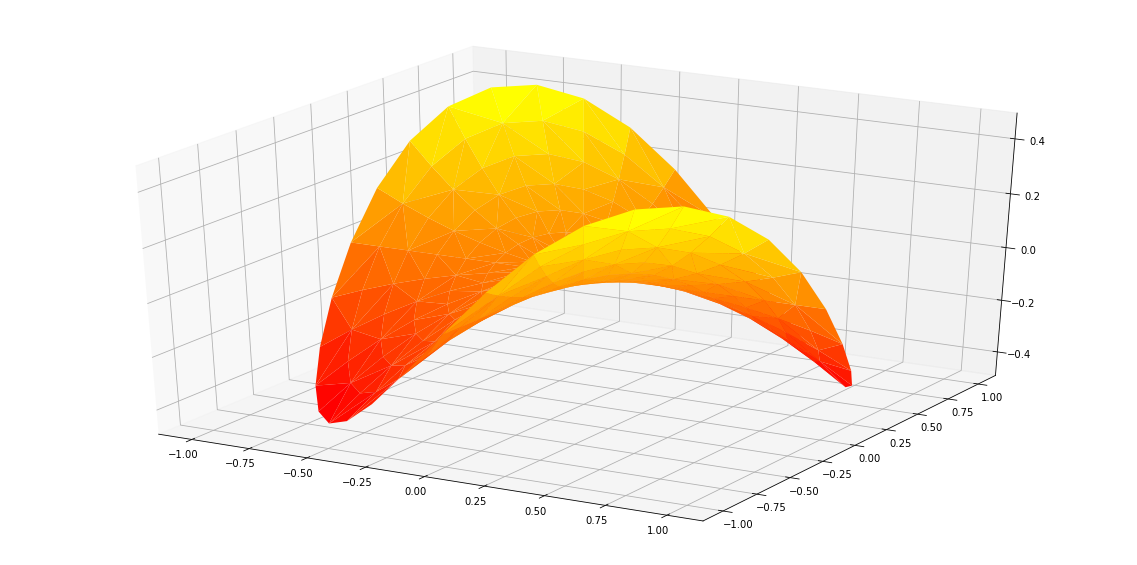

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


countof_angles = 36
countof_radii  = 8

# array - radii
array_rad = np.linspace(0.125, 1.0, countof_radii)

# array - angles
array_ang = np.linspace(0, 2*np.pi, countof_angles, endpoint=False)

# repeat all angles per radius
array_ang = np.repeat(array_ang[...,np.newaxis], countof_radii, axis=1)

# from polar (radii, angles) coords to cartesian (x, y) coords
x = np.append(0, (array_rad*np.cos(array_ang)).flatten())
y = np.append(0, (array_rad*np.sin(array_ang)).flatten())

# saddle shaped surface
z = np.sin(-x*y)

fig = plt.figure(figsize=(20,10))
ax  = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.autumn, linewidth=0.2)

plt.show()
fig.savefig("vis_3d.png")

# Example (random dataset)

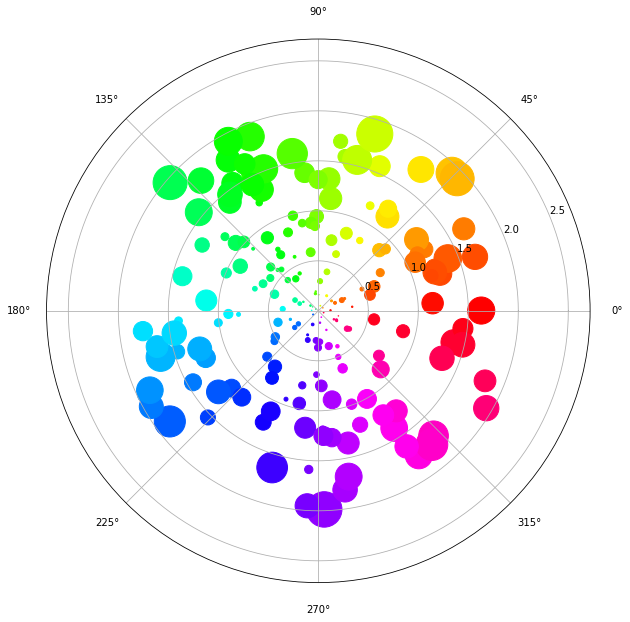

In [27]:

n_points = 200

radius   = 2 * np.random.rand(n_points)
angles   = 2 * (np.pi) * np.random.rand(n_points)
area     = 400 * (radius**2) * np.random.rand(n_points)

colors = angles

fig = plt.figure(figsize=(20,10))
ax  = plt.subplot(111, polar=True)

c = plt.scatter(angles, radius, c=colors, s=area, cmap=plt.cm.hsv)
c.set_alpha(1.95)

plt.show()
fig.savefig("vis_bubbleplot.png")